1. Country (Q3), Age (Q1), Education (Q4), Professional Experience (Q6), Salary (Q25)

In [19]:
#initializing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#reading in the file
data = pd.read_csv('clean_kaggle_data.csv', low_memory = False)

In [26]:
#defining new dataframe with the columns of interest
explore = data[['Q1','Q3','Q4','Q6','Q25']]

#analyzing the dataframe 'explore'
#printing the head of the dataframe to ensure we have the correct columns
print(explore.head())

#seeing if there are any null/NaN values that will affect data analysis.
print(explore.info())

#Returns the dimensions (AKA size) of desired datadrame
print(explore.shape)

#returning the column names
print(explore.columns)

      Q1         Q3                 Q4          Q6    Q25
0  50-54      India  Bachelor’s degree  5-10 years  30000
1  50-54  Indonesia    Master’s degree   20+ years  70000
2  22-24   Pakistan    Master’s degree   1-3 years   1000
3  45-49     Mexico    Doctoral degree   20+ years  40000
4  45-49      India    Doctoral degree   < 1 years  40000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15391 entries, 0 to 15390
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      15391 non-null  object
 1   Q3      15391 non-null  object
 2   Q4      15391 non-null  object
 3   Q6      15391 non-null  object
 4   Q25     15391 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 601.3+ KB
None
(15391, 5)
Index(['Q1', 'Q3', 'Q4', 'Q6', 'Q25'], dtype='object')


In [32]:
#descriptive statistics of 'explore'
print(explore.describe())

#showing the majority of responses in countries
print(explore['Q3'].value_counts())

                  Q25
count    15391.000000
mean     49116.009356
std      98090.207788
min       1000.000000
25%       2000.000000
50%      15000.000000
75%      60000.000000
max    1000000.000000
India                                    3376
United States of America                 1845
Other                                     832
Japan                                     652
Brazil                                    544
                                         ... 
I do not wish to disclose my location      26
Norway                                     26
Uganda                                     24
Algeria                                    23
Kazakhstan                                 22
Name: Q3, Length: 66, dtype: int64


In [31]:
#all different age groups surveyed adn the counts of each bin
print(explore['Q1'].value_counts())

25-29    3235
30-34    2626
22-24    2092
35-39    1992
40-44    1528
45-49    1141
18-21     931
50-54     791
55-59     504
60-69     454
70+        97
Name: Q1, dtype: int64


In [33]:
#education level and the associated responses
print(explore['Q4'].value_counts())

Master’s degree                                                      6799
Bachelor’s degree                                                    4777
Doctoral degree                                                      2217
Some college/university study without earning a bachelor’s degree     746
I prefer not to answer                                                334
Professional doctorate                                                290
No formal education past high school                                  228
Name: Q4, dtype: int64


In [39]:
#professional experience in years and the associated count
print(explore['Q6'].value_counts())

1-3 years                    3691
< 1 years                    2463
3-5 years                    2461
5-10 years                   2345
10-20 years                  1846
20+ years                    1624
I have never written code     961
Name: Q6, dtype: int64


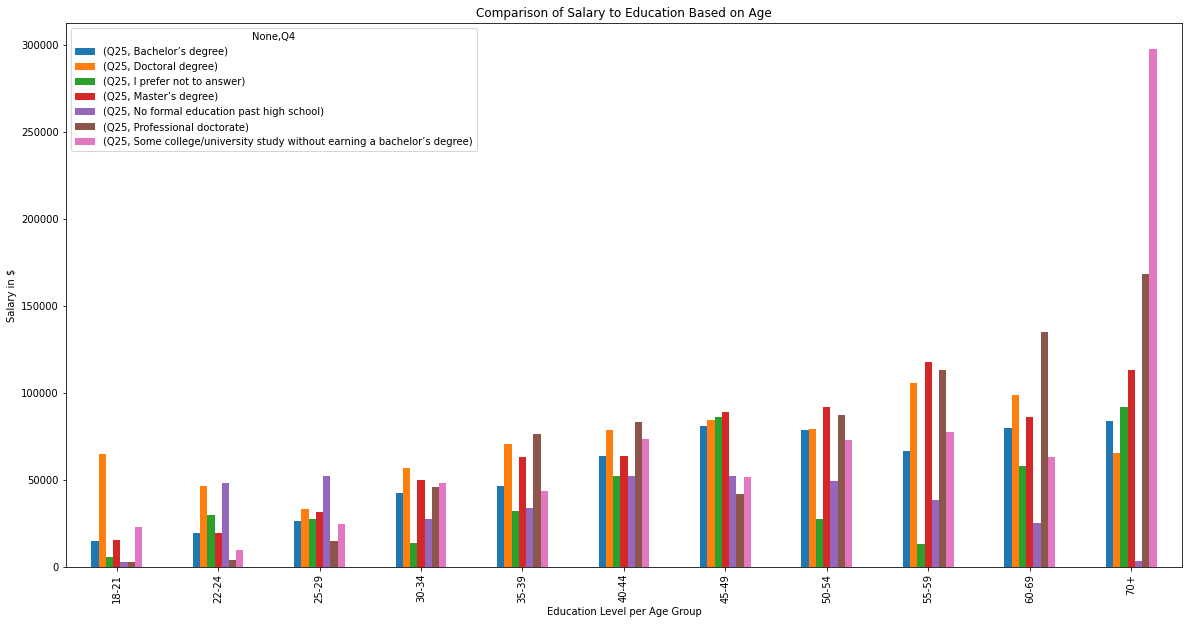

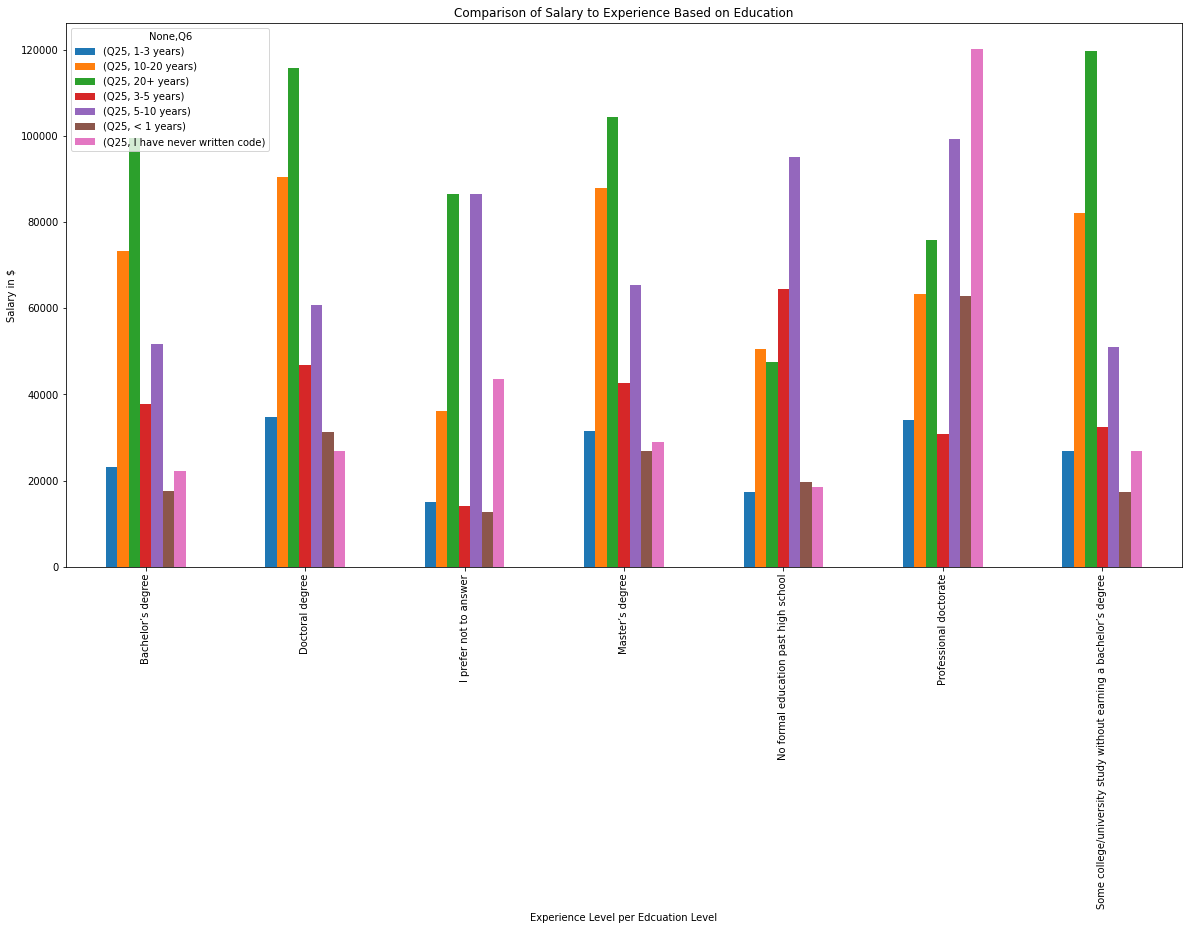

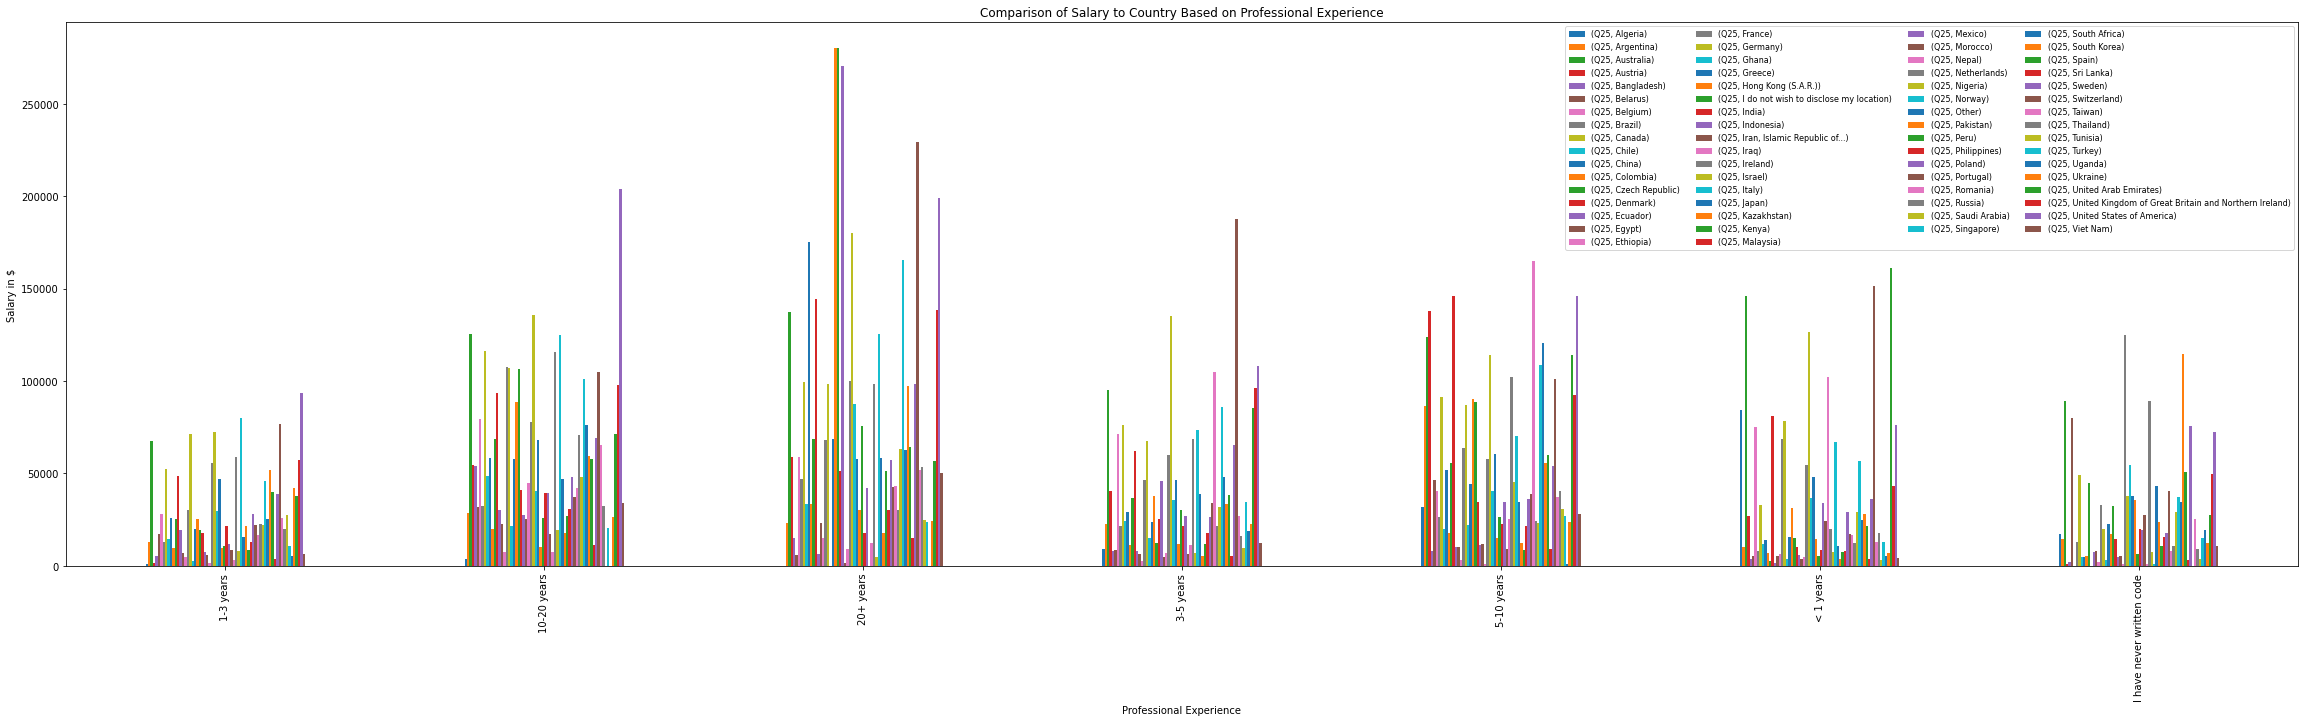

In [25]:
#plotting edcation against age
sub1 = explore.pivot_table(columns = 'Q4', index = 'Q1')
sub1.plot(kind = 'bar', figsize = (20,10), xlabel = 'Education Level per Age Group', ylabel = 'Salary in $', title = 'Comparison of Salary to Education Based on Age')
plt.show()

#plotting professional experience against education
sub2 = explore.pivot_table(columns = 'Q6', index = 'Q4')
sub2.plot(kind = 'bar', figsize = (20,10), xlabel = 'Experience Level per Edcuation Level', ylabel = 'Salary in $', title = 'Comparison of Salary to Experience Based on Education')
plt.show()

#plotting country against professional experience, I apologize for the absurdly small lines in this plot
sub3 = explore.pivot_table(columns = 'Q3', index = 'Q6')
sub3.plot(kind = 'bar', figsize = (40,10), xlabel = 'Professional Experience', ylabel = 'Salary in $', title = 'Comparison of Salary to Country Based on Professional Experience')
plt.legend(prop = {'size':8}, ncol = 4, fontsize = 12)
plt.show()

2a.

In [42]:
#initializing subset of data describing the gender and associated salary, dropping NaN values from the data set
men_women = data[['Q2','Q25']].dropna(axis = 0)

#separating men and women into 2 different data sets
men = men_women[men_women['Q2'] == 'Man']
women = men_women[men_women['Q2'] == 'Woman']

#printing descriptive statistics for each respecitve gender
print(men.describe())
print(women.describe())

                  Q25
count    12642.000000
mean     51193.600696
std      99979.274378
min       1000.000000
25%       2000.000000
50%      20000.000000
75%      60000.000000
max    1000000.000000
                  Q25
count     2482.000000
mean     34816.881547
std      72017.347888
min       1000.000000
25%       1000.000000
50%       7500.000000
75%      50000.000000
max    1000000.000000


2b.

In [ ]:
#initialize scioy for t-test
import scipy.stats as stats
from scipy.stats import ttest_ind
import random

#performing the t-test
ttest_ind(men['Q25'], women['Q25'])

Ttest_indResult(statistic=7.774059663603156, pvalue=8.088812859676164e-15)

2c.

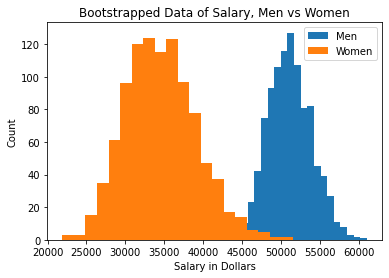

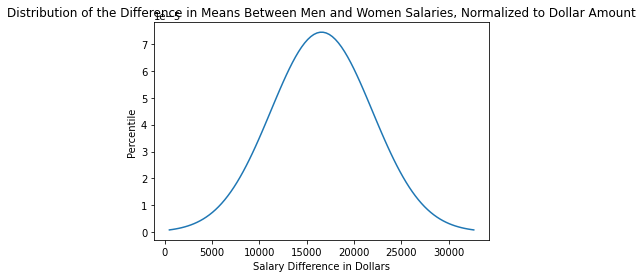

In [ ]:
#initializing bootstrap function
def bootstrap(df, colname):
    bootstrap = df.sample(n = int(0.1*len(df)), replace = True)
    return bootstrap[colname].mean()

#looping the bootstrap function 1000x
boot_men = [bootstrap(men, 'Q25') for i in range(1000)]
boot_women = [bootstrap(women, 'Q25') for i in range(1000)]

#plotting the 2 histograms on the same plot
plt.hist(boot_men, bins = 20, label = 'Men')
plt.hist(boot_women, bins = 20, label = 'Women')
plt.title("Bootstrapped Data of Salary, Men vs Women")
plt.xlabel("Salary in Dollars")
plt.ylabel("Count")
plt.legend()
plt.show()

#developing a plot for the distribution of the difference of means between men and women
array_men = np.array(boot_men)
array_women = np.array(boot_women)
diff = array_men-array_women
single_diff = np.average(diff)
std = np.std(array_men-array_women)
x_line = np.linspace(single_diff-3*std, single_diff+3*std, 100)
from scipy.stats import norm
plt.plot(x_line, norm.pdf(x_line, single_diff, std))
plt.title("Distribution of the Difference in Means Between Men and Women Salaries, Normalized to Dollar Amount")
plt.xlabel("Salary Difference in Dollars")
plt.ylabel("Percentile")
plt.show()


2d.

In [ ]:
#T-test on the bootstrapped data
ttest_ind(boot_men, boot_women)

Ttest_indResult(statistic=94.82991429601628, pvalue=0.0)

3a.

In [43]:
#initializing subset of data describing the education and associated salary, dropping NaN values from the data set
educate = data[['Q4','Q25']].dropna(axis = 0)

#separating education profiles into individual datasets
bach = educate[educate['Q4'] == 'Bachelor’s degree']
master = educate[educate['Q4'] == 'Master’s degree']
doc = educate[educate['Q4'] == 'Doctoral degree']

print(bach.describe())
print(master.describe())
print(doc.describe())

                  Q25
count     4777.000000
mean     35578.291815
std      89382.060777
min       1000.000000
25%       1000.000000
50%       7500.000000
75%      40000.000000
max    1000000.000000
                  Q25
count     6799.000000
mean     52706.868657
std      90928.786678
min       1000.000000
25%       3000.000000
50%      25000.000000
75%      70000.000000
max    1000000.000000
                  Q25
count     2217.000000
mean     70641.181777
std     117160.947589
min       1000.000000
25%       4000.000000
50%      40000.000000
75%      90000.000000
max    1000000.000000


3b.

In [ ]:
#performing one-way ANOVA on the salary values of each group
fval, pval = stats.f_oneway(bach.Q25, master.Q25, doc.Q25)

#look at external library for documentaion
print(fval, pval)

109.75776160573479 5.107696325253651e-48


3c.

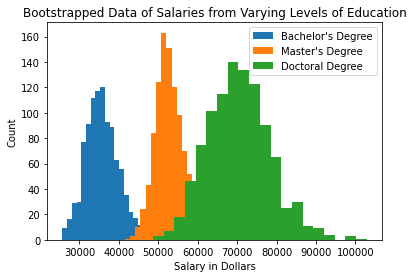

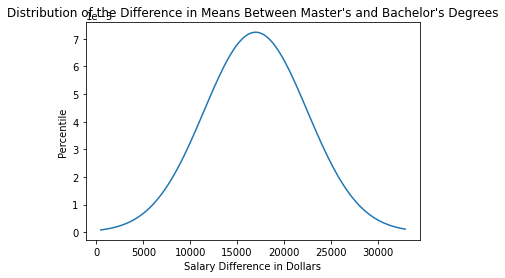

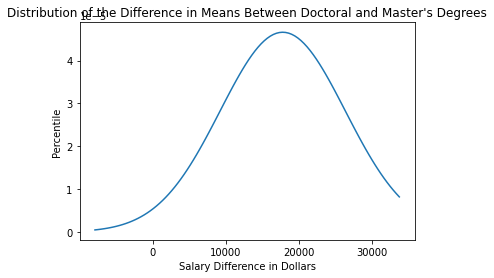

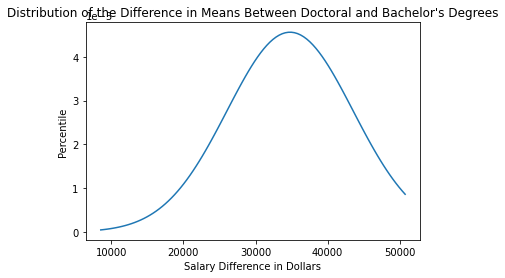

In [ ]:
#bootstrapping each category for 1000 iterations
boot_bach = [bootstrap(bach, 'Q25') for i in range(1000)]
boot_master = [bootstrap(master, 'Q25') for i in range(1000)]
boot_doc = [bootstrap(doc, 'Q25') for i in range(1000)]

#plotting all 3 bootstrapped datasets onto one plot
plt.hist(boot_bach, bins = 20, label = "Bachelor's Degree")
plt.hist(boot_master, bins = 20, label = "Master's Degree")
plt.hist(boot_doc, bins = 20, label = "Doctoral Degree")
plt.title("Bootstrapped Data of Salaries from Varying Levels of Education")
plt.legend()
plt.xlabel("Salary in Dollars")
plt.ylabel("Count")
plt.show()

array_bach = np.array(boot_bach)
array_master = np.array(boot_master)
array_doc = np.array(boot_doc)

#distribution of the difference of means between master's and bachelor's degrees
diff_1 = array_master-array_bach
single_diff_1 = np.average(diff_1)
std_1 = np.std(array_master-array_bach)
x_line_1 = np.linspace(single_diff_1-3*std_1, single_diff_1+3*std, 100)
plt.plot(x_line_1, norm.pdf(x_line_1, single_diff_1, std_1))
plt.title("Distribution of the Difference in Means Between Master's and Bachelor's Degrees")
plt.xlabel("Salary Difference in Dollars")
plt.ylabel("Percentile")
plt.show()

#distribution of the difference of means between doctoral and master's degrees
diff_2 = array_doc-array_master
single_diff_2 = np.average(diff_2)
std_2 = np.std(array_doc-array_master)
x_line_2 = np.linspace(single_diff_2-3*std_2, single_diff_2+3*std, 100)
plt.plot(x_line_2, norm.pdf(x_line_2, single_diff_2, std_2))
plt.title("Distribution of the Difference in Means Between Doctoral and Master's Degrees")
plt.xlabel("Salary Difference in Dollars")
plt.ylabel("Percentile")
plt.show()

#distribution of the difference of means between doctoral and bachelor's degrees
diff_3 = array_doc-array_bach
single_diff_3 = np.average(diff_3)
std_3 = np.std(array_doc-array_bach)
x_line_3 = np.linspace(single_diff_3-3*std_3, single_diff_3+3*std, 100)
plt.plot(x_line_3, norm.pdf(x_line_3, single_diff_3, std_3))
plt.title("Distribution of the Difference in Means Between Doctoral and Bachelor's Degrees")
plt.xlabel("Salary Difference in Dollars")
plt.ylabel("Percentile")
plt.show()

3d.

In [ ]:
#performing one-way ANOVA on bootstrapped education data
fval, pval = stats.f_oneway(boot_bach, boot_master, boot_doc)
print(fval, pval)

9756.22402544579 0.0
